In [194]:
using LinearAlgebra
# using PyPlot
using Plots
using ForwardDiff
using RobotZoo
using RobotDynamics
using Ipopt
using MathOptInterface
using StaticArrays
using SparseArrays
# Pkg.add("MATLAB")
using MATLAB 
include("Non_lin_exp.jl")
include("CR3BP_Dynamics.jl")
const MOI = MathOptInterface;

In [195]:
h = 0.1 
Nx = 6     # number of state
Nu = 1     # number of controls
Tfinal = 8 # final time-50 knot points or something similar (Get Tfinal from approximation) 
Nt = round(Int,Tfinal/h)+1   # number of time steps-52
thist = Array(range(0,h*(Nt-1), step=h));#0:180,step:3.5
n_nlp = (Nx+Nu)*Nt # number of decision variables-364
m_nlp = Nx*(Nt+1) #318
u_idx = [(Nx+Nu)*(i-1) .+ (Nx+1:Nx+Nu) for i = 1:Nt];
x_idx = [(Nx+Nu)*(i-1) .+ (1:Nx) for i = 1:Nt];
Uref = h*ones(Nt);


In [196]:
# Calc of Reference Trajectory 
Xref =[zeros(Nx) for i=1:Nt];

for k = 1:Nt
    Pos = Non_lin_exp(thist[k]);
    Xref[k][1] = Pos[1];
    Xref[k][2] = Pos[2];
    Xref[k][3] = Pos[3];
    Vels = ForwardDiff.derivative(Non_lin_exp,thist[k]);
    Xref[k][4] = Vels[1];
    Xref[k][5] = Vels[2];
    Xref[k][6] = Vels[3];
end

eigvalues = [zeros(Nx) for i=1:Nt]
eigs1 = zeros(Nt)
eigs2 = zeros(Nt)
eigs3 = zeros(Nt)
eigs4 = zeros(Nt)
eigs5 = zeros(Nt)
eigs6 = zeros(Nt)

Ieigs1 = zeros(Nt)
Ieigs2 = zeros(Nt)
Ieigs3 = zeros(Nt)
Ieigs4 = zeros(Nt)
Ieigs5 = zeros(Nt)
Ieigs6 = zeros(Nt)

for k = 1:Nt
    A_ = ForwardDiff.jacobian(x_ -> CR3BPdynamics(x_), Xref[k]);
    eigvalues[k] = real(eigvals(A_))
    eigs1[k] = real(eigvals(A_))[1]
    eigs2[k] = real(eigvals(A_))[2]
    eigs3[k] = real(eigvals(A_))[3]
    eigs4[k] = real(eigvals(A_))[4]
    eigs5[k] = real(eigvals(A_))[5]
    eigs6[k] = real(eigvals(A_))[6]

    Ieigs1[k] = imag(eigvals(A_))[1]
    Ieigs2[k] = imag(eigvals(A_))[2]
    Ieigs3[k] = imag(eigvals(A_))[3]
    Ieigs4[k] = imag(eigvals(A_))[4]
    Ieigs5[k] = imag(eigvals(A_))[5]
    Ieigs6[k] = imag(eigvals(A_))[6]
end



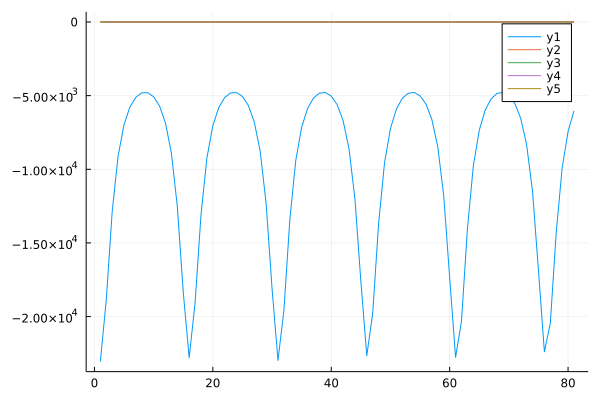

In [217]:
# mat"""
# plot($eigs1, '-x')
# hold on
# plot($eigs2, '-x')
# plot($eigs3, '-x')
# plot($eigs4, '-x')
# plot($eigs5, '-x')
# plot($eigs6, '-x')
# hold off
# title("Real Part of Eigenvalues")


# """
p = Plots.plot(eigs1)
Plots.plot!(p,eigs2)
Plots.plot!(p,eigs3)
Plots.plot!(p,eigs4)
Plots.plot!(p,eigs5)
# Plots.plot!(p,eigs6)

# f = Plots.plot(Ieigs1)
# Plots.plot!(f,Ieigs2)
# Plots.plot!(f,Ieigs3)
# Plots.plot!(f,Ieigs4)
# Plots.plot!(f,Ieigs5)
# Plots.plot!(f,Ieigs6)

# figure
# plot($Ieigs1, '-x')
# hold on
# plot($Ieigs2, '-x')
# plot($Ieigs3, '-x')
# plot($Ieigs4, '-x')
# plot($Ieigs5, '-x')
# plot($Ieigs6, '-x')
# hold off
# title("Imaginary Part of Eigenvalues")


In [237]:
w_p = 2.086453455;
Ax = 206000
Az = 110000

k = 3.2292680962;
c2 = 4.0610735668;
c3 = 3.0200105081;
c4 = 3.0305378797;
λ = sqrt((c2 + sqrt(9*c2^2 - 8*c2))/2);
d1 = ((3*λ^2)/k)*(k*(6*λ^2 - 1) - 2*λ);
a21 = 3*c3*(k^2 - 2)/(4*(1 + 2*c2)); 
a22 = 3*c3/(4*(1 + 2*c2));
a23 = -((3*c3*λ)/(4*k*d1))*(3*(k^3)*λ - 6*k*(k-λ) + 4); 
a24 = -((3*c3*λ)/(4*k*d1))*(3*k*λ + 2);
b21 = -3*c3*λ*(3*k*λ - 4)/(2*d1);
b22 = -3*c3*λ/d1;
d21 = -c3/(2*λ^2);

# @show k
# @show (w_p^2 + 1 + 2*c2)/(2*w_p)
# @show (2*λ)/(λ^2 + 1 - c2)

s1 = (2*λ*(λ*(1 + k^2) - 2*k))^(-1)*((3/2)*c3*(2*a21*(k^2 - 2) - a23*(k^2 + 2) - 2*k*b21) - (3/8)*c4*(3*k^4 - 8*k^2 + 8))
s2 = (2*λ*(λ*(1 + k^2) - 2*k))^(-1)*((3/2)*c3*(2*a22*(k^2 - 2) + a24*(k^2 + 2) + 2*k*b22 + 5*d21) + (3/8)*c4*(12 - k^2))
# s1 = -8.246608317e-1
# s2 = 1.210985938e-1
@show s1
@show s2
ν₁ = 0
ν₂ = s1*Ax^2 + s2*Az^2
ν = 1 + ν₁ + ν₂
ν = 1
T = (2*pi)/(w_p*ν)#/sqrt(3)#*59.01860264189096
@show T

# Az = Array(range(0, 5e5, step = 0.5e4));
# T = zeros(length(Az))
# for i = 1:length(Az)
#     ν₂ = s1*Ax^2 + s2*Az[i]^2
#     ν = 1 + ν₁ + ν₂
#     T[i] = (2*pi)/(w_p*ν)/sqrt(3)
# end
# mat"""
# plot($Az, $T, 'bx')
# """
# # Δ = 0.29221
# # l₁ = -15.96560314
# # l₂ =  1.740900800





s1 = -0.6360266315449271
s2 = 0.08991515020407995
T = 3.011418870678611


In [223]:
γ = 0.1001090475489518e-1
μ = 0.3040357143e-5
c2 = (1/(γ^3))*(μ + (-1^2)*(((1-μ)*(γ^2))/((1 - γ)^3)))

ω = sqrt((2 - c2 + sqrt(9*(c2^2) - 8*c2))/2)
# ω = 2.086453455;

T = (2*pi)/ω

T*365

# @show (w_p^2 + 1 + 2*c2)/(2*w_p)




(w_p ^ 2 + 1 + 2c2) / (2w_p) = -46.607684615850324


-46.607684615850324

In [119]:
# Sun Earth System
# m1 = 
# m2 = 
μ = 3.040423398444176e-6
r1 = (1 - (μ/3)^(1/3), 0)
r2 = (1 + (μ/3)^(1/3), 0)
r3 = (1 + (5/12)*μ, 0)
# r4 = ((m1 - μ)/2,  sqrt(3)/2)
# r5 = ((m1 - μ)/2, -sqrt(3)/2)

@show r1
@show r2
@show r3




r1 = (0.989955285350833, 0)
r2 = (1.010044714649167, 0)
r3 = (1.0000012668430827, 0)


(1.0000012668430827, 0)